In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

# study of rise/fall times, propagation delay and race-around condition for a JK flip-flop

In [21]:
def get_data(file):
    xs = [] 
    y1s = [] 
    y2s = [] 
    
    with open(f'data/{file}.csv','r') as file: 
        data = csv.reader(file, delimiter = ',') 
        next(data)
        next(data)
        for row in data: 
            xs.append(float(row[0])) 
            y1s.append(float(row[1])) 
            y2s.append(float(row[2])) 

    return np.array(xs), np.array(y1s), np.array(y2s)*4

## rise time

Rise time: 32.9 ns


Text(0, 0.5, 'Voltage (V)')

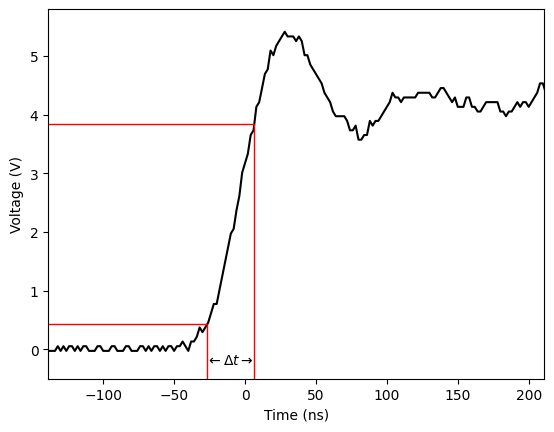

In [20]:
xs, y1s, _ = get_data('set1')
xs = xs*1e9
y1s = y1s-np.mean(y1s[:100])
max_y, min_y = np.mean(y1s[-100:]), np.mean(y1s[:100])
plt.axis([-138.8, 210.9, -0.5, 5.8])
plt.plot(xs, y1s, '-k')
x1, x2 = -26.5, 6.4
plt.hlines(y=max_y*0.1, xmin=-200, xmax=x1, color='r', linestyle='-', linewidth=1)
plt.hlines(y=max_y*0.9, xmin=-200, xmax=x2, color='r', linestyle='-', linewidth=1)
plt.vlines(x=x1, ymin=-1, ymax=max_y*0.1, color='r', linestyle='-', linewidth=1)
plt.vlines(x=x2, ymin=-1, ymax=max_y*0.9, color='r', linestyle='-', linewidth=1)
print(f'Rise time: {round((x2-x1), 2)} ns')
plt.text(-27.5, -0.25, f'$\leftarrow \Delta t \\rightarrow$', size=10)

plt.xlabel('Time (ns)')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (ns)')
plt.ylabel('Voltage (V)')

## fall time

Fall time: 31.8 ns


Text(0, 0.5, 'Voltage (V)')

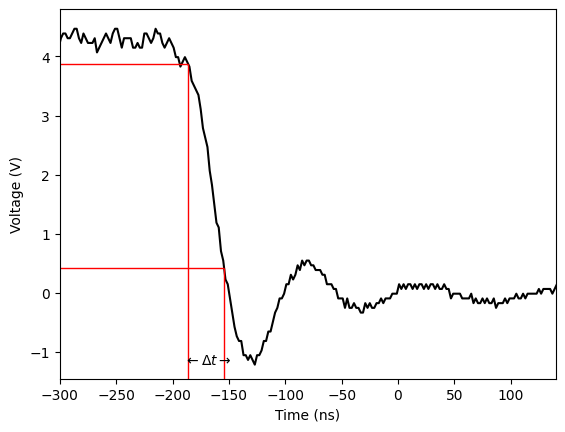

In [19]:
xs, y1s, _ = get_data('set3')
xs = (xs-np.mean(xs))*1e9
y1s = y1s-np.mean(y1s[-100:])
min_y, max_y = np.mean(y1s[-100:]), np.mean(y1s[:100])
plt.axis([-300, 140, -1.45, 4.8])
plt.plot(xs, y1s, '-k')
x1, x2 = -186.1, -154.3
plt.hlines(y=max_y*0.9, xmin=-500, xmax=x1, color='r', linestyle='-', linewidth=1)
plt.hlines(y=max_y*0.1, xmin=-400, xmax=x2, color='r', linestyle='-', linewidth=1)
plt.vlines(x=x2, ymin=-3, ymax=max_y*0.1, color='r', linestyle='-', linewidth=1)
plt.vlines(x=x1, ymin=-3, ymax=max_y*0.9, color='r', linestyle='-', linewidth=1)
print(f'Fall time: {round((x2-x1), 2)} ns')
plt.text(-190, -1.2, f'$\leftarrow\Delta t\\rightarrow$', size=10)
plt.xlabel('Time (ns)')
plt.ylabel('Voltage (V)')

## rise and fall times of Q

i.e. Rise time: 10.15 ns
i.e. Fall time: 5.11 ns


Text(0, 0.5, 'Voltage (V)')

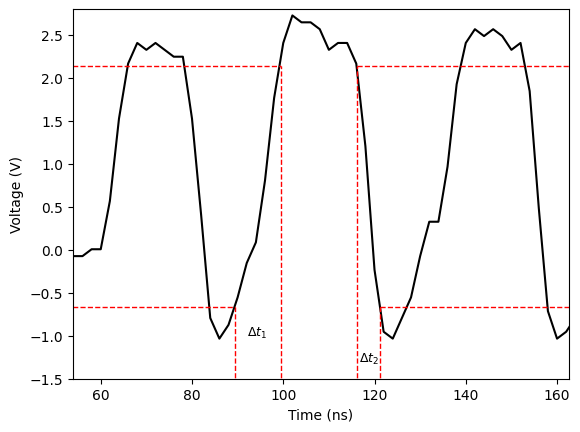

In [33]:
xs, y1s, y2s = get_data('set6')
xs = xs*1e9
y2s = y2s-np.mean(y2s[:100])
plt.axis([53.9, 162.6, -1.5, 2.8])
plt.plot(xs, y2s, '-k', label='JK output (Q)')
max_y, min_y = 2.491, -1.015
y1, y2 = (max_y-min_y)*0.1+min_y, (max_y-min_y)*0.9+min_y

x1, x2 = 89.33, 99.48
plt.hlines(y=y1, xmin=-100, xmax=x1, color='r', linestyle='--', linewidth=1)
plt.hlines(y=y2, xmin=-100, xmax=x2, color='r', linestyle='--', linewidth=1)
plt.vlines(x=x1, ymin=-2, ymax=y1, color='r', linestyle='--', linewidth=1)
plt.vlines(x=x2, ymin=-2, ymax=y2, color='r', linestyle='--', linewidth=1)
plt.text(92, -1, f'$\Delta t_1$', size=9)

x3, x4 = 116.07, 121.18
plt.hlines(y=y2, xmin=x3, xmax=200, color='r', linestyle='--', linewidth=1)
plt.hlines(y=y1, xmin=x4, xmax=200, color='r', linestyle='--', linewidth=1)
plt.vlines(x=x3, ymin=-2, ymax=y2, color='r', linestyle='--', linewidth=1)
plt.vlines(x=x4, ymin=-2, ymax=y1, color='r', linestyle='--', linewidth=1)
plt.text(116.5, -1.3, f'$\Delta t_2$', size=9)

print(f'i.e. Rise time: {np.round(x2-x1, 2)} ns')
print(f'i.e. Fall time: {np.round(x4-x3, 2)} ns')

plt.xlabel('Time (ns)')
plt.ylabel('Voltage (V)')

## propagation delay

Propagation delay: 51.2 ns


Text(0, 0.5, 'Voltage (V)')

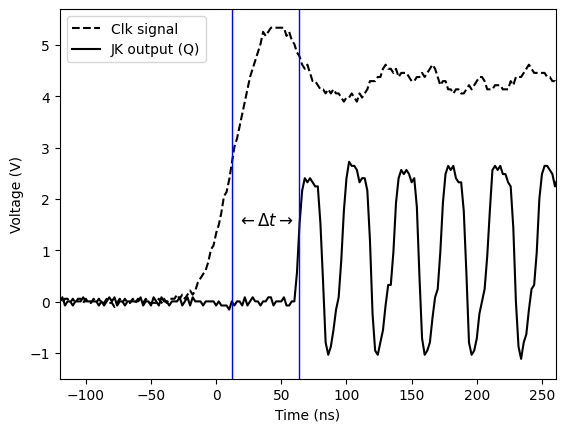

In [23]:
xs, y1s, y2s = get_data('set6')
xs = xs*1e9
y2s = y2s-np.mean(y2s[:100])
y1s = y1s-np.mean(y1s[:100])
plt.axis([-120, 260.6, -1.5, 5.7])
plt.plot(xs, y1s, '--k', label='Clk signal')
plt.plot(xs, y2s, '-k', label='JK output (Q)')
x1, x2 = 12.2, 63.4
plt.axvline(x=x1, color='b', linestyle='-', linewidth=1)
plt.axvline(x=x2, color='b', linestyle='-', linewidth=1)
print(f'Propagation delay: {round((x2-x1), 2)} ns')
plt.text(16, 1.5, f'$\leftarrow \Delta t \\rightarrow$', size=12)
plt.legend(loc='upper left')
plt.xlabel('Time (ns)')
plt.ylabel('Voltage (V)')

## race-around condition

Time period of racing: 36.1 ns
i.e. Racing frequency: 27.7 MHz


Text(0, 0.5, 'Voltage (V)')

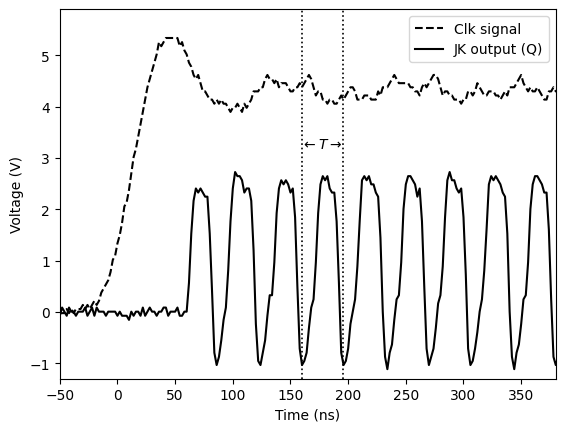

In [30]:
xs, y1s, y2s = get_data('set6')
xs = xs*1e9
y2s = y2s-np.mean(y2s[:100])
y1s = y1s-np.mean(y1s[:100])
plt.axis([-50, 380, -1.3, 5.9])
plt.plot(xs, y1s, '--k', label='Clk signal')
plt.plot(xs, y2s, '-k', label='JK output (Q)')
x1, x2 = 159.8, 195.9
plt.axvline(x=x1, color='k', linestyle=':', linewidth=1.2)
plt.axvline(x=x2, color='k', linestyle=':', linewidth=1.2)
plt.text(159, 3.2, f'$\leftarrow T\\rightarrow$', size=10)
print(f'Time period of racing: {np.round(x2-x1, 2)} ns')
print(f'i.e. Racing frequency: {np.round(1e3/(x2-x1), 2)} MHz')
plt.legend()

plt.xlabel('Time (ns)')
plt.ylabel('Voltage (V)')

# working with .wfm oscilloscope waveforms

In [ ]:
%pip install --user RigolWFM

In [18]:
import RigolWFM.wfm as rigol
filename = 'wfm/a.wfm'
scope = 'DS1102E'

w = rigol.Wfm.from_file(filename, scope)
w.plot()
plt.show()